# Synbols: Probing Learning Algorithms with Synthetic Datasets

![](https://github.com/ElementAI/synbols/raw/master/title.png)

[Paper](https://arxiv.org/abs/2009.06415)
[Github](https://github.com/ElementAI/synbols)


> We introduce Synbols — Synthetic Symbols — a tool for rapidly generating new datasets with a rich composition of latent features rendered in low resolution images.

> Synbols leverages the large amount of symbols available in the Unicode standard and the wide range of artistic font provided by the open font community. Our tool's high-level interface provides a language for rapidly generating new distributions on the latent features, including various types of textures and occlusions.


>While it is beneficial to evaluate our
>methods on real-world large-scale datasets, relying on and requiring massive computation cycles is
>limiting and even contributes to biasing the problems and methods we develop:
>
>• Slow iteration cycles: Waiting weeks for experimental results reduces our ability to explore
>and gather insights about our methods and data.
>
>• Low accessibility: It creates disparities, especially for researchers and organizations with
>limited computation and hardware budgets.
>
>• Poor exploration: Our research is biased toward fast methods
>
>• Climate change impact: Recent analyses conclude that the greenhouse gases
emitted from training very large-scale models, such as transformers, can be equivalent to 10
years’ worth of individual emissions.


#### In this notebook

You will learn how to use Synbols and:
* Control the latent space
* Adding complex patterns to your letters or background
* How to do segmentation and localization datasets.


In addition, we will train a Pytorch Model on a dataset generated with Synbols.

In [1]:
# Some imports and utils.

import synbols
from synbols.data_io import pack_dataset
from synbols import generate
from synbols import drawing

from synbols.visualization import plot_dataset
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline
def show_ds(attr_sampler, verbose=False, show_mask=False):
    """Generate and show a Synbols dataset from an attribute sampler."""
    x, mask, y = pack_dataset(generate.dataset_generator(attr_sampler, 100, generate.flatten_mask))
    if verbose:
        print("Example of a label")
        pprint(y[0])

    plt.figure('dataset', figsize=[5, 5])
    plot_dataset(x, y,h_axis=None,v_axis=None, n_row=10, n_col=10)

    plt.show()
    if show_mask:
        plt.figure('dataset', figsize=[5, 5])
        plot_dataset(mask, y,h_axis=None,v_axis=None, n_row=10, n_col=10)

        plt.show()

Generating data as never been easier!
By default, everything is random: fonts, alphabets, color, rotation, etc. See [generate.basic_image_sampler](https://synbols.readthedocs.io/en/latest/synbols/synbols.html#synbols.generate.basic_attribute_sampler) documentation for more details!

Let's generate 100 images and plot them.

100%|██████████| 100/100 [00:01<00:00, 71.86it/s]


Example of a label
{'alphabet': 'english',
 'background': {'seed': 3153963297, 'style': 'Gradient'},
 'char': 'i',
 'font': 'Ribeye',
 'foreground': {'seed': 2968321903, 'style': 'Gradient'},
 'is_bold': 'False',
 'is_slant': 'False',
 'overlap_score': 0.0,
 'pixel_noise_scale': 0.01,
 'resolution': (64, 64),
 'rotation': -0.118644058173976,
 'scale': 0.669738601856944,
 'seed': 3148535186,
 'symbols': [{'alphabet': 'english',
              'char': 'i',
              'font': 'Ribeye',
              'foreground': {'seed': 2968321903, 'style': 'Gradient'},
              'is_bold': 'False',
              'is_slant': 'False',
              'rotation': -0.118644058173976,
              'scale': 0.669738601856944,
              'translation': (0.4397008237419656, 0.7398173042028032)}],
 'translation': (0.4397008237419656, 0.7398173042028032)}


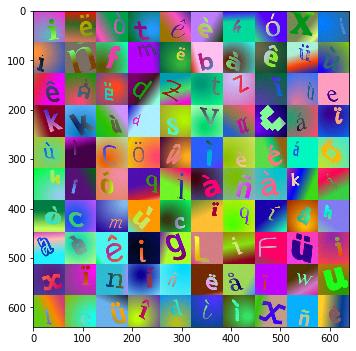

In [2]:
# The attribute sampler is the object that will generate the latent representation of each image
# (char, translation, rotation, etc)
attr_sampler = generate.basic_attribute_sampler(resolution=(64, 64))
show_ds(attr_sampler, verbose=True)

---

Synbols can also generate text! Simply, change the char to the string of your choosing!

100%|██████████| 100/100 [00:01<00:00, 77.90it/s]


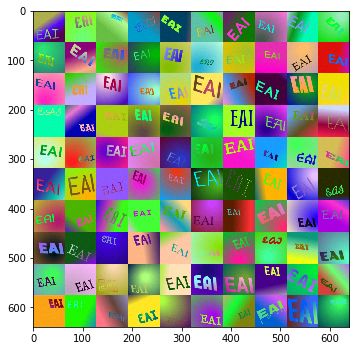

In [3]:
attr_sampler = generate.basic_attribute_sampler(char="EAI", resolution=(64, 64))
show_ds(attr_sampler)

### Control the latent variable generation

Fix some properties like foreground color and background pattern is possible.

For all possible patterns, see [synbols.drawing](https://synbols.readthedocs.io/en/latest/synbols/synbols.html#module-synbols.drawing) documentation.

100%|██████████| 100/100 [00:01<00:00, 62.89it/s]


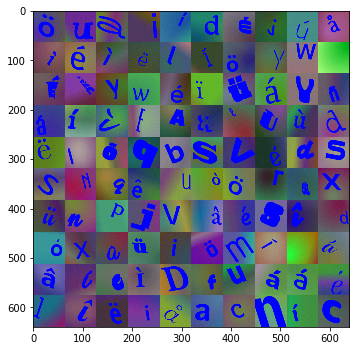

In [4]:
bg = drawing.MultiGradient(alpha=0.5, n_gradients=2, types=('linear', 'radial'))
fg = drawing.SolidColor((255, 0, 0))

attr_sampler = generate.basic_attribute_sampler(resolution=(64, 64), foreground=fg, background=bg, inverse_color=False)
show_ds(attr_sampler)

100%|██████████| 100/100 [00:02<00:00, 39.92it/s]


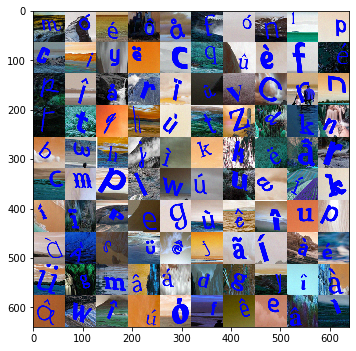

In [3]:
# We can also use images for the pattern.
# We have some images in /images.

bg = drawing.ImagePattern(root='/images')
fg = drawing.SolidColor((255, 0, 0))

attr_sampler = generate.basic_attribute_sampler(resolution=(64, 64), foreground=fg, background=bg, inverse_color=False)
show_ds(attr_sampler)

100%|██████████| 100/100 [00:02<00:00, 39.88it/s]


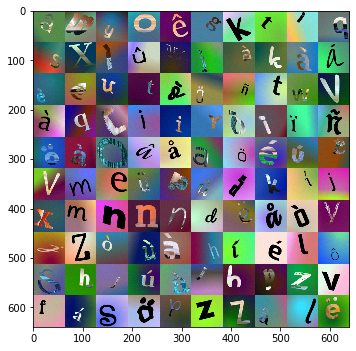

In [20]:
bg = drawing.MultiGradient(alpha=0.5, n_gradients=2, types=('linear', 'radial'))
fg = drawing.ImagePattern(rotation=0, translation=0, crop=True)

attr_sampler = generate.basic_attribute_sampler(resolution=(64, 64), foreground=fg, background=bg, inverse_color=False)
show_ds(attr_sampler)

### Multiple symbols and segmentation

To have multiple synbols per image, simply set `n_symbols`.

We can also plot the mask, the image will be indexed by the character index.

With the mask, you can train a segmentation or object detection model!


100%|██████████| 100/100 [00:04<00:00, 23.37it/s]


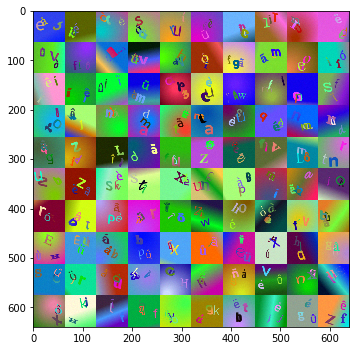

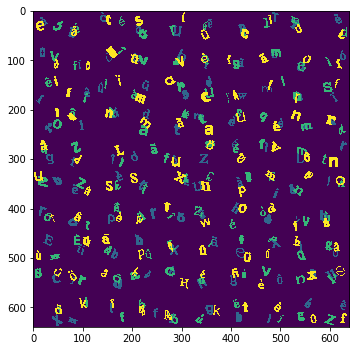

In [5]:
attr_sampler = generate.basic_attribute_sampler(resolution=(64, 64),n_symbols=3, scale=0.3)
show_ds(attr_sampler, show_mask=True)

### Modifying the latent space distribution

For all attributes, you can supply a callable and control the bias in your dataset. For example, we put 80% of the letters as blue and 20% of the letters as red.

100%|██████████| 100/100 [00:01<00:00, 61.60it/s]


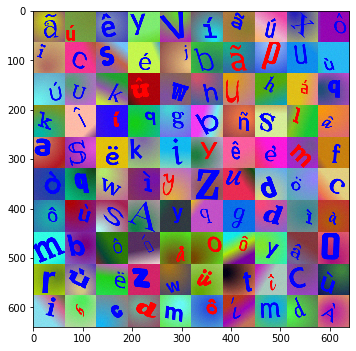

In [17]:
import random
def biased_color(rng):
    if rng.random() > 0.2:
        fg = drawing.SolidColor((255, 0, 0))
    else:
        fg = drawing.SolidColor((0, 0, 255))
    return fg

bg = None
fg = biased_color
attr_sampler = generate.basic_attribute_sampler(resolution=(64, 64), inverse_color=False, foreground=fg, background=bg)
show_ds(attr_sampler)

# Add occlusions for harder tasks

Adding occlusions is a great way to make your dataset more difficult and is easy to do with Synbols.

Depending on the size of the occlusion, this can add data uncertainty to the dataset.

100%|██████████| 100/100 [00:02<00:00, 49.68it/s]


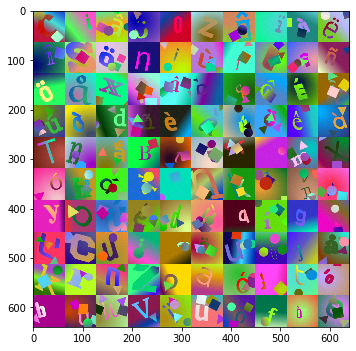

In [7]:
attr_sampler = generate.basic_attribute_sampler(resolution=(64, 64))

# Add between 0 and 5 oadd_occlusionusions.
attr_sampler = generate.add_occlusion(attr_sampler, n_occlusion=lambda rng: rng.randint(0, 5))
show_ds(attr_sampler)

# Train your model with Synbols!

In this section, you will use Synbols and train a Pytorch model.

We will generate a dataset according to **your** specification and train a VGG-16 on it!

In [1]:
# Install a pip package in the current Jupyter kernel
%pip install --user pytorch_lightning torch torchvision

     |################################| 408 kB 1.2 MB/s eta 0:00:01
     |################################| 748.8 MB 7.0 MB/s eta 0:00:011     |################                | 378.5 MB 7.0 MB/s eta 0:00:53     |################                | 391.5 MB 6.9 MB/s eta 0:00:52     |#########################       | 595.9 MB 6.8 MB/s eta 0:00:23     |#########################       | 600.0 MB 6.8 MB/s eta 0:00:22     |##########################      | 625.9 MB 7.1 MB/s eta 0:00:18     |##########################      | 628.7 MB 6.9 MB/s eta 0:00:18     |############################    | 669.8 MB 6.9 MB/s eta 0:00:12     |#############################   | 683.2 MB 7.2 MB/s eta 0:00:10     |#############################   | 693.9 MB 7.0 MB/s eta 0:00:08     |#############################   | 697.9 MB 7.0 MB/s eta 0:00:08
     |################################| 5.9 MB 8.1 MB/s eta 0:00:01
     |################################| 2.8 MB 8.5 MB/s eta 0:00:01
     |#############################

  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-py3-none-any.whl size=3949 sha256=9246c0b73706fc4593af45121f5c04b32bc1d3f85e5ce9c8fb33a0f05c4d13c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-9pd6m8pn/wheels/6a/f5/9c/f8331a854f7a8739cf0e74c13854e4dd7b1af11b04fe1dde13
Successfully built future PyYAML idna-ssl
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-

In [2]:
# We add Pytorch installation path to our PATH so that we can import it.
import sys
sys.path.insert(0, '/.local/bin')
sys.path.insert(0, '/.local/lib/python3.6/site-packages')

In [3]:
# If the import does not work, we suggest to restart the kernel.
import torch
from torch.utils.data import Dataset

print("CUDA:", torch.cuda.is_available(), "Num. gpus:", torch.cuda.device_count())

def get_char(y):
    # Function to get the char of an image
    return y['char']

CUDA: False Num. gpus: 0


**Dataset object and generation**

In Pytorch, we need to make our own `torch.utils.data.Dataset` that will hold the data we want to train or predict on.

**Dataset object and generation**

In Pytorch, we need to make our own `torch.utils.data.Dataset` that will hold the data we want to train or predict on.

**Dataset object and generation**

In Pytorch, we need to make our own `torch.utils.data.Dataset` that will hold the data we want to train or predict on.

**Dataset object and generation**

In Pytorch, we need to make our own `torch.utils.data.Dataset` that will hold the data we want to train or predict on.

In [9]:
# Let's generate our test set
from synbols.fonts import LANGUAGE_MAP
# 2x because we have upper and lower case
num_classes = 2*len(LANGUAGE_MAP['english'].get_alphabet().symbols)
print("Number of symbols", num_classes)
attr_sampler = generate.basic_attribute_sampler(resolution=(64, 64))
x_test, _, y_test = pack_dataset(generate.dataset_generator(attr_sampler, 5000, generate.flatten_mask))
x_val, _, y_val = pack_dataset(generate.dataset_generator(attr_sampler, 5000, generate.flatten_mask))


# For our train set, you can do whatever you want!
fg = None
bg = None
attr_sampler = generate.basic_attribute_sampler(foreground=fg, background=bg, resolution=(64, 64))
x_train, _, y_train = pack_dataset(generate.dataset_generator(attr_sampler, 40000, generate.flatten_mask))


# We define our Pytorch Dataset
class SynbolsDataset(Dataset):
    def __init__(self, x, y, transform):
        self.x, self.y, self.transform = x,y,transform
        self.y = [get_char(yi) for yi in self.y]
        self._all_chars = sorted(list(set(self.y)))
        
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        x,y = self.x[idx], self.y[idx]
        return self.transform(x), self._all_chars.index(y)


  0%|          | 6/5000 [00:00<01:33, 53.34it/s]

Number of symbols 96


100%|██████████| 40000/40000 [10:41<00:00, 62.38it/s]


### Pytorch Lightning

We can now define our [Pytorch Lightning Model](https://github.com/PyTorchLightning/pytorch-lightning)

* Define the Dataloader used for train/val/test
* Define the model (in this case VGG-16), optimizer, etc.
* Define metrics (just the loss for now)

In [26]:
from pytorch_lightning import LightningModule
from torchvision import transforms as T
from torchvision.models import vgg16
from torch import nn, optim
from torch.utils.data import DataLoader
from collections import OrderedDict

class SynbolsClassifier(LightningModule):
    train_tf = T.Compose([T.ToPILImage(), T.RandomHorizontalFlip(), T.ToTensor()])
    test_tf = T.Compose([T.ToPILImage(), T.ToTensor()])
    def __init__(self, train_set, val_set, test_set, hparams):
        super().__init__()
        self.hparams = hparams
        # You can modify this to be any model you want!
        self.vgg16 = vgg16(num_classes=hparams.num_classes)
        # We use the crossentropy with no weight.
        self.criterion = nn.CrossEntropyLoss()
        self.train_set, self.val_set, self.test_set = train_set, val_set, test_set
    
    def forward(self, x):
        return self.vgg16(x)

    def training_step(self, batch, batch_idx):
        """
        Lightning calls this inside the training loop
        :param batch:
        :return:
        """
        # forward pass
        x, y = batch
        y_hat = self(x)

        # calculate loss
        loss_val = self.criterion(y_hat, y)

        output = OrderedDict({
            'loss': loss_val
        })
        return output

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)

        # calculate loss
        loss_val = self.criterion(y_hat, y)
        output = OrderedDict({
            'test_loss': loss_val})
        return output
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)

        # calculate loss
        loss_val = self.criterion(y_hat, y)
        output = OrderedDict({
            'val_loss': loss_val})
        return output

    def configure_optimizers(self):
        """
        return whatever optimizers we want here
        :return: list of optimizers
        """
        optimizer = optim.SGD(self.parameters(), lr=self.hparams.learning_rate,
                              weight_decay=self.hparams.weight_decay,
                             nesterov=True, momentum=0.9)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)
        return [optimizer], [scheduler]

    def train_dataloader(self):
        return DataLoader(self.train_set, self.hparams.batch_size, shuffle=True,
                          num_workers=4)
    
    def val_dataloader(self):
        return DataLoader(self.val_set, self.hparams.batch_size, shuffle=False,
                          num_workers=4)

    def test_dataloader(self):
        return DataLoader(self.test_set, self.hparams.batch_size, shuffle=False,
                          num_workers=4)

    def validation_epoch_end(self, outputs):
        avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        tensorboard_logs = {'avg_val_loss': avg_loss}
        return {'val_loss': avg_loss, 'log': tensorboard_logs}

    def test_epoch_end(self, outputs):
        avg_loss = torch.stack([x['test_loss'] for x in outputs]).mean()
        tensorboard_logs = {'avg_test_loss': avg_loss}
        return {'test_loss': avg_loss, 'log': tensorboard_logs}

In [31]:
from argparse import Namespace
from pytorch_lightning import Trainer

# Create our Synbols datasets
train_ds = SynbolsDataset(x_train, y_train, transform=SynbolsClassifier.train_tf)
val_ds = SynbolsDataset(x_val, y_val, transform=SynbolsClassifier.test_tf)
test_ds = SynbolsDataset(x_test, y_test, transform=SynbolsClassifier.test_tf)

# Make our hyperparameters
hparams = Namespace(batch_size=128, learning_rate=0.001, weight_decay=5e-4, num_classes=num_classes)
model = SynbolsClassifier(train_ds, val_ds, test_ds, hparams)

"""
Train our model!

We will train for a maximum of 100 epochs, but if the model starts to overfit, we will stop before.
"""
trainer = Trainer(logger=False, max_epochs=100, early_stop_callback=True, gpus=torch.cuda.device_count())
trainer.fit(model)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | vgg16     | VGG              | 134 M 
1 | criterion | CrossEntropyLoss | 0     


Saving latest checkpoint..
Epoch 00060: early stopping triggered.


1

In [32]:
# We can now test our model!
trainer.test(model)

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'avg_test_loss': tensor(0.7288, device='cuda:0'),
 'test_loss': tensor(0.7288, device='cuda:0')}
--------------------------------------------------------------------------------



[{'avg_test_loss': 0.7288100719451904, 'test_loss': 0.7288100719451904}]